# StakeHolder and  Business Problem



**Stakeholder:** The customer retention team at a telecommunications company.

**Business Problem:** Customer churn/customer cancelling their services represents revenue loss for syria telecom providers,as acquiring new customers is expensive than retaining existing ones. The goal is to build a predictive classification model in order to identify customers that are high risk churning.This will allow the retention team to target these customers with interventions, such as:
* personalized discounts
* upgraded plans
* improved customer support<br>

This will help reduce overall churn rate from its current level of approximately 14.5% and improve long_term customer loyalty and profitability. 

**Objective:**

Predict whether a customer will soon stop doing business with Syria Tel.

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [106]:
#display all the columns
pd.set_option('display.max_columns',None)

In [107]:
#Load Data
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [108]:
#confirm number of rows
df.shape[0]

3333

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

# EDA

In [110]:
#check for unique values
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [111]:
#check for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

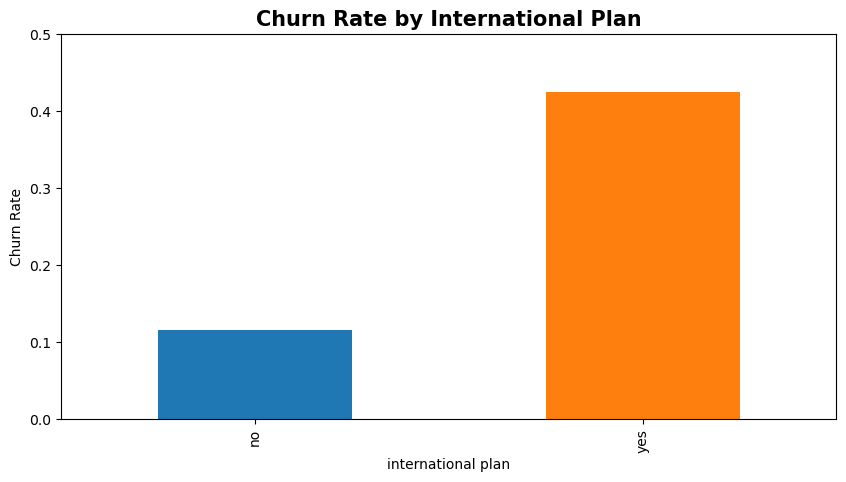

In [112]:
# 1. Churn by International Plan
plt.figure(figsize=(10,5))
df.groupby('international plan')['churn'].mean().plot(kind='bar', color=['#1f77b4','#ff7f0e'])
plt.title('Churn Rate by International Plan', fontsize=15, fontweight='bold')
plt.ylabel('Churn Rate')
plt.ylim(0, 0.5)
plt.show()

<Figure size 800x600 with 0 Axes>

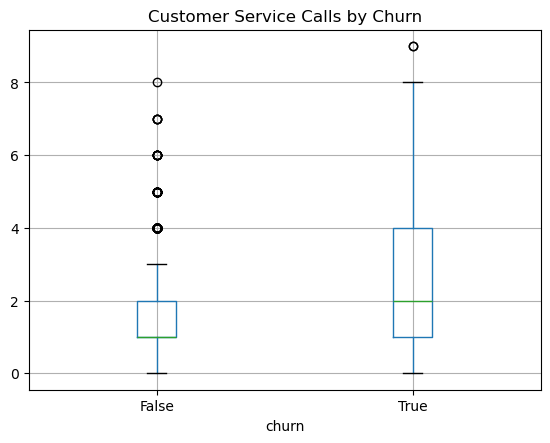

In [113]:
#customer service calls by churn
plt.figure(figsize=(8,6))
df.boxplot(column='customer service calls', by='churn')
plt.title('Customer Service Calls by Churn')
plt.suptitle('')
plt.show()

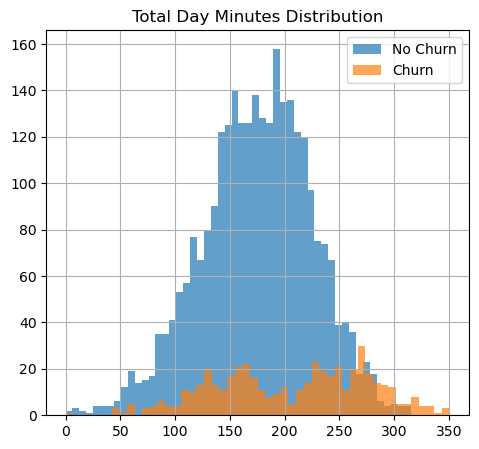

In [114]:
#Total Day Minutes Distribution by Churn
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
df[df['churn']==False]['total day minutes'].hist(bins=50, alpha=0.7, label='No Churn')
df[df['churn']==True]['total day minutes'].hist(bins=50, alpha=0.7, label='Churn')
plt.title('Total Day Minutes Distribution')
plt.legend()

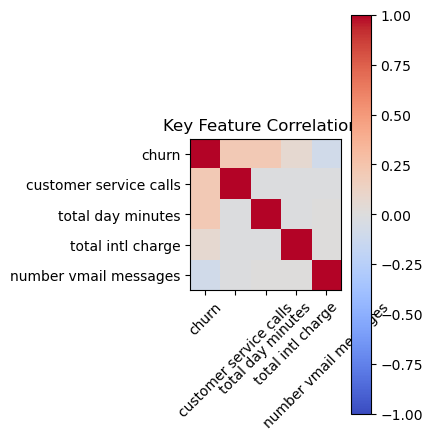

In [115]:
# 4. Correlation Heatmap (top features)
plt.subplot(1,2,2)
top_features = ['churn', 'customer service calls', 'total day minutes', 
                'total intl charge', 'number vmail messages']
corr = df[top_features].corr()
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(top_features)), top_features, rotation=45)
plt.yticks(range(len(top_features)), top_features)
plt.title('Key Feature Correlations')
plt.tight_layout()
plt.show()

# Post Analysis

**Churn is driven by two things**
* `Cost Sensitivity` - Heavy daytime users(core business/personal use) get expensive bills which makes them leave.
* `Service frustration` - Customers who call support atmost times are likely to churn.

**International plan** users are a high-risk ninche (42% churn) - they are price-sensitive and aware of alternatives.

**Voice mail plan** correlates more with settled customers.

The dataset shows clear actionable segments for retention
* High day minutes and international plan
* Multiple customer service calls (>=3)

**Business takeaway:** The Telco Business should focus on retaining daytime heavy users and frequent callers - these are the highest leverage points. 

## Modeling

We'll build two models:
* **Logistic Regression** -> suited for classification when handling binary 
* **Decision Tree** -> non linear model suited to capture interactions and easy to visualize

The above models will be used to compare key metrics suitable for imbalanced data like this churn rate of `14.5%`
 
* **Accuracy:** Overall correctness
* **F1-Score:** Harmonic mean of precision and recall
* **ROC-AUC:** Measures discrimination ability

In [161]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score,roc_auc_score, roc_curve,RocCurveDisplay,auc,classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#check the columns in the data set
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [118]:
#data preparation - Drop unwanted columns

drop_cols = [ 'phone number', 'total day charge', 'total eve charge', 'total night charge', 'total intl charge', 'area code'] 
df = df.drop(columns=drop_cols)

In [ ]:
#convert churn to binary(0/1)
df['churn']=df['churn'].map({True: 1, False: 0})

In [ ]:
#confirm the datatype of churn if its an int
type(df['churn'][0])

numpy.int64

In [ ]:
#confirm number of columns needed
df.shape[1]

15

In [121]:
#Features and target
X = df.drop('churn',axis=1)
y = df['churn']

In [122]:
#preprocessing - categorical and numerical columns
cat_cols = ['state','international plan','voice mail plan']
num_cols = [col for col in X.columns if col not in cat_cols]

In [123]:
#preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(),num_cols),
        ('cat', OneHotEncoder(drop='first',handle_unknown='ignore'),cat_cols)
    ]
)

In [124]:
preprocessor 

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['account length', 'number vmail messages',
                                  'total day minutes', 'total day calls',
                                  'total eve minutes', 'total eve calls',
                                  'total night minutes', 'total night calls',
                                  'total intl minutes', 'total intl calls',
                                  'customer service calls']),
                                ('cat',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 ['state', 'international plan',
                                  'voice mail plan'])])

In [125]:
#split data (80/20, stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [164]:
#build models using pipeline
log_Reg = Pipeline([
    ("preprocess", preprocessor),
    ("model", LogisticRegression(max_iter=1000))
])
log_Reg.fit(X_train,y_train)
y_pred_log = log_Reg.predict(X_test)
y_prob_log = log_Reg.predict_proba(X_test)[:,1]

In [165]:
tree_model = Pipeline([
    ("preprocess", preprocessor),
    ("model", DecisionTreeClassifier(max_depth=5, random_state=42))
])
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
y_prob_tree = tree_model.predict_proba(X_test)[:, 1]

Logistic Regression Confusion Matrix:


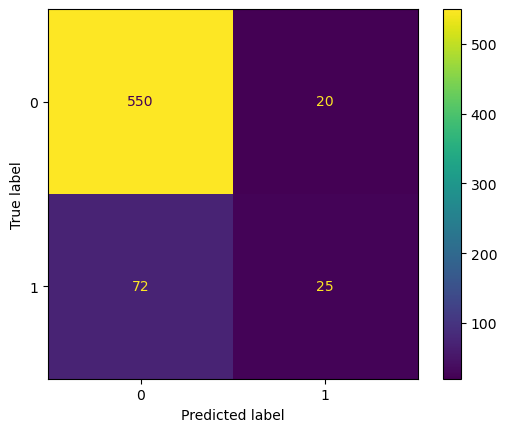

In [183]:
cm_log = confusion_matrix(y_test, y_pred_log)

print("Logistic Regression Confusion Matrix:")
#print(cm_log)

display = ConfusionMatrixDisplay(confusion_matrix= cm_log)
display.plot()
plt.show()

Decision Tree Matrix:


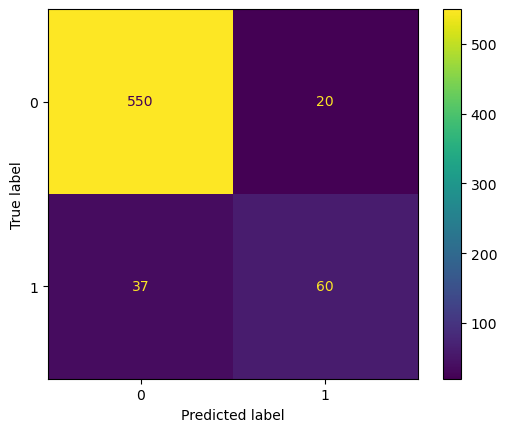

In [182]:
cm_tree = confusion_matrix(y_test, y_pred_tree)

print("Decision Tree Matrix:")
#print(cm_tree)

display = ConfusionMatrixDisplay(confusion_matrix= cm_tree)
display.plot()
plt.show()

In [ ]:
#check the values of churn
y_test.value_counts()

churn
0    570
1     97
Name: count, dtype: int64

In [ ]:

tn, fp, fn, tp = cm_log.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 550
False Positives: 20
False Negatives: 72
True Positives: 25


In [158]:
tn, fp, fn, tp = cm_tree.ravel()
print("True Negatives:", tn)
print("False Positives:", fp)
print("False Negatives:", fn)
print("True Positives:", tp)

True Negatives: 550
False Positives: 20
False Negatives: 37
True Positives: 60


In [152]:
print("----------------LogisticRegression----------------------")
print(f"Sklearn's accuracy:{accuracy_score(y_test,y_pred_log)}")
print(f"Sklearn's precision_score:{precision_score(y_test,y_pred_log)}")
print(f"Sklearn's recall_score:{recall_score(y_test,y_pred_log)}")
print(f"Sklearn's f1_score:{f1_score(y_test,y_pred_log)}")

----------------LogisticRegression----------------------
Sklearn's accuracy:0.8620689655172413
Sklearn's precision_score:0.5555555555555556
Sklearn's recall_score:0.25773195876288657
Sklearn's f1_score:0.352112676056338


In [153]:
print("---------------------Decion Tree------------------------")
print(f"Sklearn's accuracy:{accuracy_score(y_test,y_pred_tree)}")
print(f"Sklearn's precision_score:{precision_score(y_test,y_pred_tree)}")
print(f"Sklearn's recall_score:{recall_score(y_test,y_pred_tree)}")
print(f"Sklearn's f1_score:{f1_score(y_test,y_pred_tree)}")

---------------------Decion Tree------------------------
Sklearn's accuracy:0.9145427286356822
Sklearn's precision_score:0.75
Sklearn's recall_score:0.6185567010309279
Sklearn's f1_score:0.6779661016949152


In [ ]:
print("---------Logistic Regression Metrics-----------")
print(classification_report(y_test,y_pred_log))
print("-----------DecisionTree----------------")
print(classification_report(y_test,y_pred_tree))

---------LogisticRegression-----------
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       570
           1       0.56      0.26      0.35        97

    accuracy                           0.86       667
   macro avg       0.72      0.61      0.64       667
weighted avg       0.84      0.86      0.84       667

-----------DecisionTree----------------
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       570
           1       0.75      0.62      0.68        97

    accuracy                           0.91       667
   macro avg       0.84      0.79      0.81       667
weighted avg       0.91      0.91      0.91       667



In [168]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, y_prob_log)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_prob_tree)

lr_auc = auc(lr_fpr, lr_tpr)
dt_auc = auc(dt_fpr, dt_tpr)

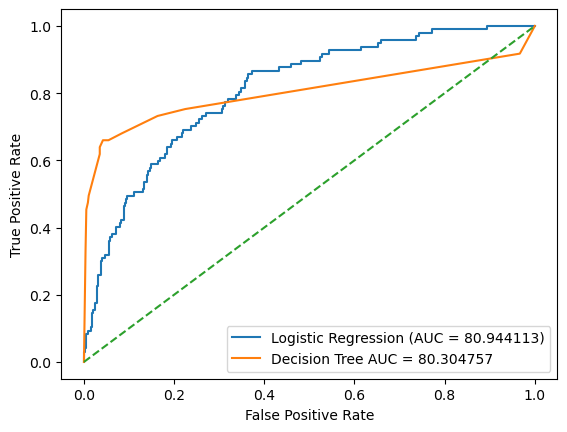

In [180]:
#plot auc for logistic regression and decision tree
plt.plot(lr_fpr,lr_tpr,label=f'Logistic Regression (AUC = {lr_auc*100:2f})')
plt.plot(dt_fpr,dt_tpr,label=f'Decision Tree AUC = {dt_auc*100:2f}')
plt.plot([0,1],[0,1],linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [181]:
#compare roc accuracy from both sides

roc_log = roc_auc_score(y_test,y_pred_log)
roc_tree = roc_auc_score(y_test,y_pred_tree)

print("\nComparison:")
if roc_tree > roc_log:
    print("Decision Tree is better based on ROC AUC.")
else:
    print("Logistic Regression is better based on ROC AUC.")


Comparison:
Decision Tree is better based on ROC AUC.
